# #Usage of model

# Model Prediction of Neo-organic molecules on Uranus

General summary of this model:

The goal: to predict the average molecular formula of neo-organic molecules that could potentially exist

The logic: utilize attributes of the four macromoecules (amino acids (structure), monosaccharides (easily accessible energy), lipids (energy storage molecules), and nucleic acids (structural coding molecules)) in order to train a model.  The attributes of the 4 classes of macromolecules were split according to the elemental composition, which in the case of the molecules that were enlisted, 5 atoms were incorporated (Hydrogen, Carbon, Nitrogen, Oxygen, and Sulfur).  From this elemental composition view, electronegativity, atomic weight, atomic radius, covalent radius, and van der waal's radius were included in the explanatory variables.  The kaggle dataset used can be found here https://www.kaggle.com/datasets/mexwell/periodic-table-of-elements .  

80 molecules will be used to train the model; 20 from each class.  20 amino acids, 20 monosaccharides, 20 lipids (fatty acids + sterols), 5 nucleic acids (but these are quadrupled in order to prevent an imbalance in the dataset)

The 5 atoms that will be examined are Uranus's main atmospheric elements: hydrogen and helium and Uranus's main core elements: silicon, iron, and nickel.

To reitierate:

explanatory variables: atomic count in earth macro molecules, electronegativitiy, atomic weight, atomic radius, covalent radius, van der waals radius

response variables: classifcation of Uranus's predictive molecules as 1.) structural molecule (analog to amino acid), 2.) fast energy molecule (analog to sugars), 3.) energy storage molecule (analog to lipids), or 4.) structural coding molecule (analog to nucleic acid).  Then examine the average distribution of atoms per each class of neo-organic molecules.

The model to be used is sklearn's Random Forest Classifier


*******MAIN TAKEAWAYS FROM RESULTS*******
1.) The average molecular formula for the structural class on Uranus is approximately H5He6Si2Fe7Ni4, fast energy class is H7He5Si4FeNi5, energy storage class is H6He5Si5Fe7Ni5, coding class is H3He6Si6Fe2Ni6

****DISCLAIMERS!******FUTURE WORK******ISSUES?********

This is the first iteration on 6/17/2024

The quadrupling of the nucleic acids in the molecular dataset may not be a wise decision

The inclusion of sulfur in the top 5 common atoms of earth macromolecules may be not a wise decision, as it only appears in two molecules (cystein and methionine)

Potentially, cofactors (vitamins) should be included as another class of macromolecules

Model needs to be retrained on more earth macromolecules, the accuracy is extremely high with very little test data (seriously push the test size to .5 and the accuracy is 100% still)

Model needs more hyperparameter tuning

For the potential composition arrays, need more ranges and then average the ranges

The molecules that were unclassifiable need a second looking at

There should be inclusion of the magnetic properties in the explanatory variables,as you will see that iron and nickel are largely a part of Uranus's core, and they are ferromagnetic, which is significant!

Need to generate potential bonding patterns



In [ ]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier

from numpy import random

from scipy import stats as st

# Train the model

In [61]:
df = pd.read_csv('explored_data.csv')
df = df.drop(columns='Unnamed: 0')
df =df.rename(columns={'Oxygen':'Atom 1','Carbon':'Atom 2', 'Hydrogen':'Atom 3', 'Nitrogen': 'Atom 4', 'Sulfur': 'Atom 5'})

train_features = list(df.columns[df.columns != 'code'])
train_features.remove('fast_energy')
train_features.remove('large_energy')
train_features.remove('structure')


X = df[train_features]
y = df[['code','fast_energy','large_energy', 'structure']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(np.array(y_test).argmax(axis=1), np.array(y_pred).argmax(axis=1))

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))
print (cm)

Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000
[[7 0 0 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 5]]


## Create a function to turn any 5 elements into a random distribution and then the dataframe fed into this model, then get prediction

Array generator:

In [10]:
def molec_comp_generator(low, high):

    atom_1 = []
    atom_2 = []
    atom_3 = []
    atom_4 = []
    atom_5 = []
    
    for x in range(80):
        array = random.randint(low,high, 5)
        atom_1.append(array[0])
        atom_2.append(array[1])
        atom_3.append(array[2])
        atom_4.append(array[3])
        atom_5.append(array[4])
        
    series_1 = pd.Series(atom_1, name='Atom 1')
    series_2 = pd.Series(atom_2, name='Atom 2')
    series_3 = pd.Series(atom_3, name='Atom 3')
    series_4 = pd.Series(atom_4, name='Atom 4')
    series_5 = pd.Series(atom_5, name='Atom 5')
    
    new_df = pd.concat([series_1, series_2], axis=1, join='inner')
    new_df = pd.concat([new_df, series_3], axis=1, join='inner')
    new_df = pd.concat([new_df, series_4], axis=1, join='inner')
    new_df = pd.concat([new_df, series_5], axis=1, join='inner')
    
    return new_df

first_df = molec_comp_generator(0,10)
print (first_df)
    
        
        

    Atom 1  Atom 2  Atom 3  Atom 4  Atom 5
0        6       2       2       4       3
1        6       1       6       2       4
2        1       4       3       9       3
3        7       9       7       5       7
4        1       8       1       6       4
..     ...     ...     ...     ...     ...
75       1       8       6       4       6
76       0       7       8       2       5
77       8       9       4       9       4
78       4       0       6       0       7
79       0       0       8       8       7

[80 rows x 5 columns]


In [11]:
def prod_columns(trans_df, orig_df, column):
    for x in range(len(orig_df)):
        prod_dict = {}
        
        for y in range(len(trans_df)):
            prod = trans_df.iloc[y, x] * orig_df.loc[x, column]
            prod_dict[trans_df.index[y]] = prod
        
        
        series_prod = pd.Series(prod_dict, name = ('Atom ' + str(x+1) +' ' + column +' Prod'))
        if x == 0:
            
            new_df = pd.concat([trans_df, series_prod], axis=1, join='inner')
            
        else:
            new_df = pd.concat([new_df, series_prod], axis=1, join='inner')
    
    return new_df

In [20]:
pte = pd.read_csv('elementdatavalues.csv')
pte_2 = pte[['Name','Atomic_Weight','Electronegativity', 'Atomic_Radius','Covalent_Radius','Van_der_Waals_Radius']]
pte_2 = pte_2.fillna(0)
pte_2.head()

,Name,Atomic_Weight,Electronegativity,Atomic_Radius,Covalent_Radius,Van_der_Waals_Radius
0,Hydrogen,1.007940,2.20,5.300000e-11,3.700000e-11,1.200000e-10
1,Helium,4.002602,0.00,3.100000e-11,3.200000e-11,1.400000e-10
2,Lithium,6.941000,0.98,1.670000e-10,1.340000e-10,1.820000e-10
3,Beryllium,9.012182,1.57,1.120000e-10,9.000000e-11,0.000000e+00
4,Boron,10.811000,2.04,8.700000e-11,8.200000e-11,0.000000e+00


# Lets model Uranus, which has a major atmospheric comp of Hydrogen and Helium, with a Silicon, Iron, and Nickle core

In [21]:
pte_3 = pte_2[pte_2['Name'].isin(['Hydrogen','Helium','Silicon','Iron','Nickel'])].reset_index(drop=True)
pte_3.head()

,Name,Atomic_Weight,Electronegativity,Atomic_Radius,Covalent_Radius,Van_der_Waals_Radius
0,Hydrogen,1.007940,2.20,5.300000e-11,3.700000e-11,1.200000e-10
1,Helium,4.002602,0.00,3.100000e-11,3.200000e-11,1.400000e-10
2,Silicon,28.085500,1.90,1.110000e-10,1.110000e-10,2.100000e-10
3,Iron,55.845000,1.83,1.560000e-10,1.250000e-10,0.000000e+00
4,Nickel,58.693400,1.91,1.490000e-10,1.210000e-10,1.630000e-10


In [22]:
electro_df = prod_columns(first_df, pte_3, 'Electronegativity')
electro_df.head()

,Atom 1,Atom 2,Atom 3,Atom 4,Atom 5,Atom 1 Electronegativity Prod,Atom 2 Electronegativity Prod,Atom 3 Electronegativity Prod,Atom 4 Electronegativity Prod,Atom 5 Electronegativity Prod
0,6,2,2,4,3,13.2,0.0,3.8,7.32,5.73
1,6,1,6,2,4,13.2,0.0,11.4,3.66,7.64
2,1,4,3,9,3,2.2,0.0,5.7,16.47,5.73
3,7,9,7,5,7,15.4,0.0,13.3,9.15,13.37
4,1,8,1,6,4,2.2,0.0,1.9,10.98,7.64


In [24]:
weight_df = prod_columns(electro_df, pte_3, 'Atomic_Weight')
weight_df.head()

,Atom 1,Atom 2,Atom 3,Atom 4,Atom 5,Atom 1 Electronegativity Prod,Atom 2 Electronegativity Prod,Atom 3 Electronegativity Prod,Atom 4 Electronegativity Prod,Atom 5 Electronegativity Prod,Atom 1 Atomic_Weight Prod,Atom 2 Atomic_Weight Prod,Atom 3 Atomic_Weight Prod,Atom 4 Atomic_Weight Prod,Atom 5 Atomic_Weight Prod
0,6,2,2,4,3,13.2,0.0,3.8,7.32,5.73,6.04764,8.005204,56.1710,223.380,176.0802
1,6,1,6,2,4,13.2,0.0,11.4,3.66,7.64,6.04764,4.002602,168.5130,111.690,234.7736
2,1,4,3,9,3,2.2,0.0,5.7,16.47,5.73,1.00794,16.010408,84.2565,502.605,176.0802
3,7,9,7,5,7,15.4,0.0,13.3,9.15,13.37,7.05558,36.023418,196.5985,279.225,410.8538
4,1,8,1,6,4,2.2,0.0,1.9,10.98,7.64,1.00794,32.020816,28.0855,335.070,234.7736


In [25]:
atomic_df = prod_columns(weight_df, pte_3, 'Atomic_Radius')

In [26]:
covalent_df = prod_columns(atomic_df, pte_3, 'Covalent_Radius')

In [27]:
final_df = prod_columns(covalent_df, pte_3, 'Van_der_Waals_Radius')

In [28]:
final_df.head()

,Atom 1,Atom 2,Atom 3,Atom 4,Atom 5,Atom 1 Electronegativity Prod,Atom 2 Electronegativity Prod,Atom 3 Electronegativity Prod,Atom 4 Electronegativity Prod,Atom 5 Electronegativity Prod,...,Atom 1 Covalent_Radius Prod,Atom 2 Covalent_Radius Prod,Atom 3 Covalent_Radius Prod,Atom 4 Covalent_Radius Prod,Atom 5 Covalent_Radius Prod,Atom 1 Van_der_Waals_Radius Prod,Atom 2 Van_der_Waals_Radius Prod,Atom 3 Van_der_Waals_Radius Prod,Atom 4 Van_der_Waals_Radius Prod,Atom 5 Van_der_Waals_Radius Prod
0,6,2,2,4,3,13.2,0.0,3.8,7.32,5.73,...,2.220000e-10,6.400000e-11,2.220000e-10,5.000000e-10,3.630000e-10,7.200000e-10,2.800000e-10,4.200000e-10,0.0,4.890000e-10
1,6,1,6,2,4,13.2,0.0,11.4,3.66,7.64,...,2.220000e-10,3.200000e-11,6.660000e-10,2.500000e-10,4.840000e-10,7.200000e-10,1.400000e-10,1.260000e-09,0.0,6.520000e-10
2,1,4,3,9,3,2.2,0.0,5.7,16.47,5.73,...,3.700000e-11,1.280000e-10,3.330000e-10,1.125000e-09,3.630000e-10,1.200000e-10,5.600000e-10,6.300000e-10,0.0,4.890000e-10
3,7,9,7,5,7,15.4,0.0,13.3,9.15,13.37,...,2.590000e-10,2.880000e-10,7.770000e-10,6.250000e-10,8.470000e-10,8.400000e-10,1.260000e-09,1.470000e-09,0.0,1.141000e-09
4,1,8,1,6,4,2.2,0.0,1.9,10.98,7.64,...,3.700000e-11,2.560000e-10,1.110000e-10,7.500000e-10,4.840000e-10,1.200000e-10,1.120000e-09,2.100000e-10,0.0,6.520000e-10


In [42]:
def prod_final_df(trans_df, orig_df, columns):
    
    for z in range(len(columns)):
        
        for x in range(len(orig_df)):
            
            prod_dict = {}

            for y in range(len(trans_df)):
                
                prod = trans_df.iloc[y, x] * orig_df.loc[x, columns[z]]
                prod_dict[trans_df.index[y]] = prod


            series_prod = pd.Series(prod_dict, name = ('Atom ' + str(x+1) +' ' + columns[z] +' Prod'))
            if x == 0:

                new_df = pd.concat([trans_df, series_prod], axis=1, join='inner')

            else:
                new_df = pd.concat([new_df, series_prod], axis=1, join='inner')
                
        if z == 0:

            fin_df = new_df

        else:
            fin_df = pd.concat([fin_df, new_df.iloc[:,5:]], axis=1, join='inner')
    
    return fin_df

In [43]:
final_df_trial = prod_final_df(first_df, pte_3, ['Electronegativity','Atomic_Weight','Atomic_Radius','Covalent_Radius','Van_der_Waals_Radius'])
final_df_trial.head()

,Atom 1,Atom 2,Atom 3,Atom 4,Atom 5,Atom 1 Electronegativity Prod,Atom 2 Electronegativity Prod,Atom 3 Electronegativity Prod,Atom 4 Electronegativity Prod,Atom 5 Electronegativity Prod,...,Atom 1 Covalent_Radius Prod,Atom 2 Covalent_Radius Prod,Atom 3 Covalent_Radius Prod,Atom 4 Covalent_Radius Prod,Atom 5 Covalent_Radius Prod,Atom 1 Van_der_Waals_Radius Prod,Atom 2 Van_der_Waals_Radius Prod,Atom 3 Van_der_Waals_Radius Prod,Atom 4 Van_der_Waals_Radius Prod,Atom 5 Van_der_Waals_Radius Prod
0,6,2,2,4,3,13.2,0.0,3.8,7.32,5.73,...,2.220000e-10,6.400000e-11,2.220000e-10,5.000000e-10,3.630000e-10,7.200000e-10,2.800000e-10,4.200000e-10,0.0,4.890000e-10
1,6,1,6,2,4,13.2,0.0,11.4,3.66,7.64,...,2.220000e-10,3.200000e-11,6.660000e-10,2.500000e-10,4.840000e-10,7.200000e-10,1.400000e-10,1.260000e-09,0.0,6.520000e-10
2,1,4,3,9,3,2.2,0.0,5.7,16.47,5.73,...,3.700000e-11,1.280000e-10,3.330000e-10,1.125000e-09,3.630000e-10,1.200000e-10,5.600000e-10,6.300000e-10,0.0,4.890000e-10
3,7,9,7,5,7,15.4,0.0,13.3,9.15,13.37,...,2.590000e-10,2.880000e-10,7.770000e-10,6.250000e-10,8.470000e-10,8.400000e-10,1.260000e-09,1.470000e-09,0.0,1.141000e-09
4,1,8,1,6,4,2.2,0.0,1.9,10.98,7.64,...,3.700000e-11,2.560000e-10,1.110000e-10,7.500000e-10,4.840000e-10,1.200000e-10,1.120000e-09,2.100000e-10,0.0,6.520000e-10


In [57]:
def atom_selection(low, high, elements, columns):
    
    trans_df = molec_comp_generator(low, high)
    
    pte_step_1 = pd.read_csv('elementdatavalues.csv')
    pte_step_2 = pte_step_1[['Name','Atomic_Weight','Electronegativity', 'Atomic_Radius','Covalent_Radius','Van_der_Waals_Radius']]
    pte_step_2 = pte_step_2.fillna(0)
    pte_step_3 = pte_step_2[pte_step_2['Name'].isin(elements)].reset_index(drop=True)
    
    final_df_trial = prod_final_df(trans_df, pte_step_3, columns)
    
    
    return final_df_trial
    

In [58]:
Uranus_X_test = atom_selection(0, 10, ['Hydrogen','Helium','Silicon','Iron','Nickel'], ['Electronegativity','Atomic_Weight','Atomic_Radius','Covalent_Radius','Van_der_Waals_Radius'] )

In [59]:
Uranus_X_test.head()

,Atom 1,Atom 2,Atom 3,Atom 4,Atom 5,Atom 1 Electronegativity Prod,Atom 2 Electronegativity Prod,Atom 3 Electronegativity Prod,Atom 4 Electronegativity Prod,Atom 5 Electronegativity Prod,...,Atom 1 Covalent_Radius Prod,Atom 2 Covalent_Radius Prod,Atom 3 Covalent_Radius Prod,Atom 4 Covalent_Radius Prod,Atom 5 Covalent_Radius Prod,Atom 1 Van_der_Waals_Radius Prod,Atom 2 Van_der_Waals_Radius Prod,Atom 3 Van_der_Waals_Radius Prod,Atom 4 Van_der_Waals_Radius Prod,Atom 5 Van_der_Waals_Radius Prod
0,2,4,4,6,5,4.4,0.0,7.6,10.98,9.55,...,7.400000e-11,1.280000e-10,4.440000e-10,7.500000e-10,6.050000e-10,2.400000e-10,5.600000e-10,8.400000e-10,0.0,8.150000e-10
1,9,6,3,6,5,19.8,0.0,5.7,10.98,9.55,...,3.330000e-10,1.920000e-10,3.330000e-10,7.500000e-10,6.050000e-10,1.080000e-09,8.400000e-10,6.300000e-10,0.0,8.150000e-10
2,9,5,5,0,3,19.8,0.0,9.5,0.00,5.73,...,3.330000e-10,1.600000e-10,5.550000e-10,0.000000e+00,3.630000e-10,1.080000e-09,7.000000e-10,1.050000e-09,0.0,4.890000e-10
3,0,0,7,0,8,0.0,0.0,13.3,0.00,15.28,...,0.000000e+00,0.000000e+00,7.770000e-10,0.000000e+00,9.680000e-10,0.000000e+00,0.000000e+00,1.470000e-09,0.0,1.304000e-09
4,5,9,5,5,4,11.0,0.0,9.5,9.15,7.64,...,1.850000e-10,2.880000e-10,5.550000e-10,6.250000e-10,4.840000e-10,6.000000e-10,1.260000e-09,1.050000e-09,0.0,6.520000e-10


# Time to predict the classifications of the molecules, and then map the atom labels back to the original elements

In [62]:
scaler = preprocessing.StandardScaler().fit(Uranus_X_test)
Uranus_X_train_scaled=scaler.transform(Uranus_X_test)

In [63]:
Uranus_X_train_scaled.shape

(80, 30)

In [64]:
y_pred = model_res.predict(Uranus_X_train_scaled)

In [65]:
print (y_pred)

[[False False False  True]
 [False False False  True]
 [False  True False False]
 [False False  True False]
 [False False False  True]
 [False False False  True]
 [False False  True False]
 [False  True False False]
 [False False False False]
 [False  True False False]
 [ True False False False]
 [False False False  True]
 [ True False False False]
 [False  True False False]
 [False False False  True]
 [False False False False]
 [False False  True False]
 [False False  True False]
 [ True False False False]
 [False False  True False]
 [False  True False False]
 [False False False  True]
 [False False False  True]
 [False False False  True]
 [False False False  True]
 [False False False  True]
 [False  True False False]
 [False False  True False]
 [ True False False False]
 [False False False  True]
 [False False False  True]
 [False False  True False]
 [ True False False False]
 [False False False  True]
 [False False False  True]
 [False False False  True]
 [False False False  True]
 

In [121]:
atoms = Uranus_X_test[['Atom 1','Atom 2','Atom 3','Atom 4', 'Atom 5']]
atoms = atoms.rename(columns={'Atom 1':'H','Atom 2':'He', 'Atom 3': 'Si', 'Atom 4': 'Fe', 'Atom 5': 'Ni'})


In [137]:
atoms_formula = atoms.astype('str')
atoms_formula.dtypes
atoms_formula = 'H' + atoms_formula['H'] + 'He' + atoms_formula['He'] + 'Si' + atoms_formula['Si'] + 'Fe' + atoms_formula['Fe'] + 'Ni' + atoms_formula['Ni']
atoms_formula.head()            

0    H2He4Si4Fe6Ni5
1    H9He6Si3Fe6Ni5
2    H9He5Si5Fe0Ni3
3    H0He0Si7Fe0Ni8
4    H5He9Si5Fe5Ni4
dtype: object

In [141]:
results_df = pd.DataFrame(y_pred)
empty_series = pd.Series(np.zeros(80), name=4, dtype=bool)
results_df = pd.concat([results_df, empty_series], axis=1)
results_df.head()

results_df.loc[(results_df[0] == False) & (results_df[1] == False) & (results_df[2] == False) & (results_df[3] == False), 4] = True


results_df = results_df.rename(columns={0:'structural molecule', 1:'fast energy molecule', 2:'coding molecule', 3:'energy storage molecule', 4:'no classification'})
results_df = pd.from_dummies(results_df)
results_df = results_df.rename(columns={'':'classification'})
results_df.head()

,classification
0,energy storage molecule
1,energy storage molecule
2,fast energy molecule
3,coding molecule
4,energy storage molecule


In [144]:
class_results = pd.concat([atoms_formula, results_df], axis=1)
class_results = class_results.rename(columns={0:'Formula'})
class_results.head(30)

,Formula,classification
0,H2He4Si4Fe6Ni5,energy storage molecule
1,H9He6Si3Fe6Ni5,energy storage molecule
2,H9He5Si5Fe0Ni3,fast energy molecule
3,H0He0Si7Fe0Ni8,coding molecule
4,H5He9Si5Fe5Ni4,energy storage molecule
5,H8He3Si3Fe8Ni3,energy storage molecule
6,H0He6Si8Fe3Ni4,coding molecule
7,H8He0Si4Fe0Ni7,fast energy molecule
8,H4He6Si6Fe2Ni6,no classification
9,H7He3Si0Fe0Ni5,fast energy molecule


In [145]:
analysis_df = pd.concat([atoms, results_df], axis=1)

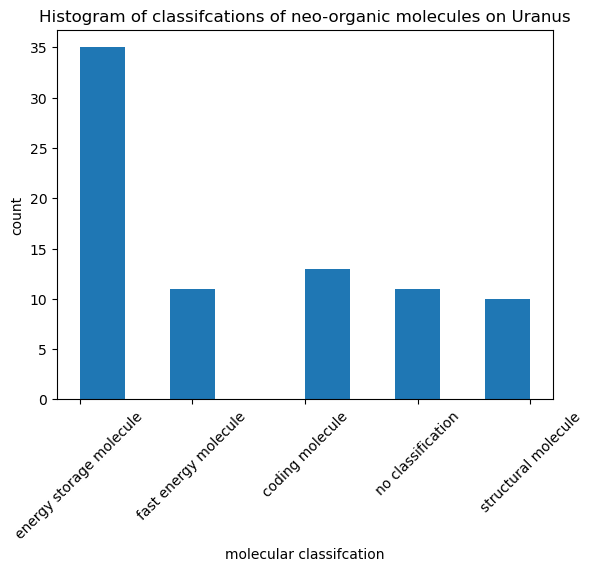

In [150]:
plt.hist(analysis_df['classification'])
plt.xlabel('molecular classifcation')
plt.ylabel('count')
plt.title('Histogram of classifcations of neo-organic molecules on Uranus')
plt.xticks(rotation=45)
plt.show()

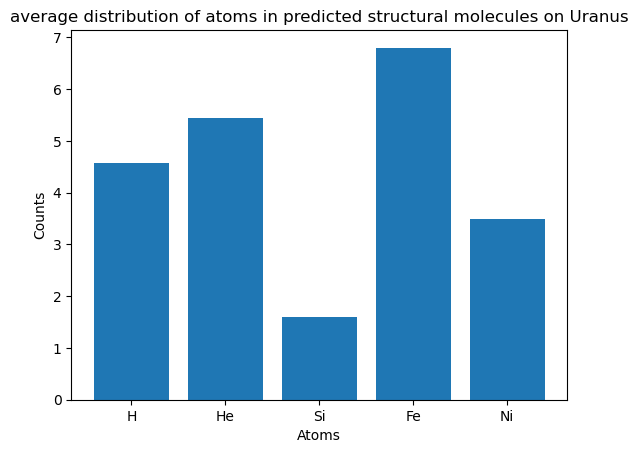

In [236]:
structural_sub = analysis_df[analysis_df['classification'] == 'structural molecule']

H_mean = np.mean([x for x in structural_sub['H'] if x != 0])
He_mean = np.mean([x for x in structural_sub['He'] if x != 0])
Si_mean = np.mean([x for x in structural_sub['Si'] if x != 0])
Fe_mean = np.mean([x for x in structural_sub['Fe'] if x != 0])
Ni_mean = np.mean([x for x in structural_sub['Ni'] if x != 0])



array_1 = [H_mean, He_mean, Si_mean, Fe_mean, Ni_mean ]
array_2 = ['H', 'He', 'Si', 'Fe', 'Ni']

plt.bar(array_2, array_1)
plt.title('average distribution of atoms in predicted structural molecules on Uranus')
plt.xlabel('Atoms')
plt.ylabel('Counts')
plt.show()

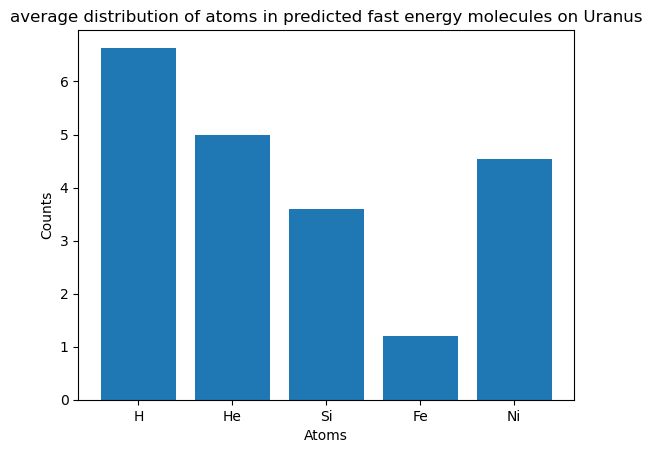

In [235]:
fast_sub = analysis_df[analysis_df['classification'] == 'fast energy molecule']

H_mean = np.mean([x for x in fast_sub['H'] if x != 0])
He_mean = np.mean([x for x in fast_sub['He'] if x != 0])
Si_mean = np.mean([x for x in fast_sub['Si'] if x != 0])
Fe_mean = np.mean([x for x in fast_sub['Fe'] if x != 0])
Ni_mean = np.mean([x for x in fast_sub['Ni'] if x != 0])



array_1 = [H_mean, He_mean, Si_mean, Fe_mean, Ni_mean ]
array_2 = ['H', 'He', 'Si', 'Fe', 'Ni']

plt.bar(array_2, array_1)
plt.title('average distribution of atoms in predicted fast energy molecules on Uranus')
plt.xlabel('Atoms')
plt.ylabel('Counts')
plt.show()

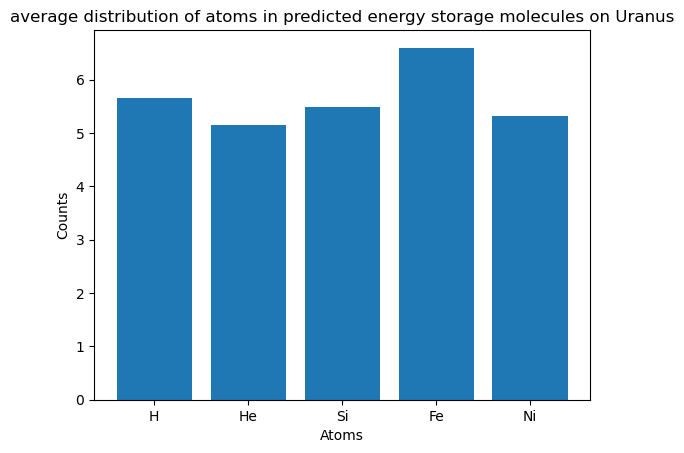

In [234]:
store_sub = analysis_df[analysis_df['classification'] == 'energy storage molecule']

H_mean = np.mean([x for x in store_sub['H'] if x != 0])
He_mean = np.mean([x for x in store_sub['He'] if x != 0])
Si_mean = np.mean([x for x in store_sub['Si'] if x != 0])
Fe_mean = np.mean([x for x in store_sub['Fe'] if x != 0])
Ni_mean = np.mean([x for x in store_sub['Ni'] if x != 0])



array_1 = [H_mean, He_mean, Si_mean, Fe_mean, Ni_mean ]
array_2 = ['H', 'He', 'Si', 'Fe', 'Ni']

plt.bar(array_2, array_1)
plt.title('average distribution of atoms in predicted energy storage molecules on Uranus')
plt.xlabel('Atoms')
plt.ylabel('Counts')
plt.show()

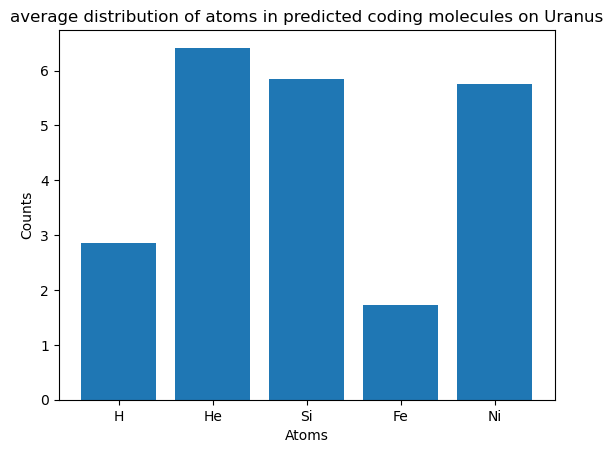

In [233]:
code_sub = analysis_df[analysis_df['classification'] == 'coding molecule']

H_mean = np.mean([x for x in code_sub['H'] if x != 0])
He_mean = np.mean([x for x in code_sub['He'] if x != 0])
Si_mean = np.mean([x for x in code_sub['Si'] if x != 0])
Fe_mean = np.mean([x for x in code_sub['Fe'] if x != 0])
Ni_mean = np.mean([x for x in code_sub['Ni'] if x != 0])



array_1 = [H_mean, He_mean, Si_mean, Fe_mean, Ni_mean ]
array_2 = ['H', 'He', 'Si', 'Fe', 'Ni']

plt.bar(array_2, array_1)
plt.title('average distribution of atoms in predicted coding molecules on Uranus')
plt.xlabel('Atoms')
plt.ylabel('Counts')
plt.show()